In [1]:
# Runs all statistical analyses for each condition/model used, saves outputs (graphs of GFPs, ERFs, significant temporal clusters, significant spatiotemporal clusters, regression analysis outputs etc)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
__author__ = "Lance Abel"
__copyright__ = "2022"
__credits__ = "With input from Paul Sowman"
__license__ = "GPL"
__version__ = "27"
__maintainer__ = "Lance Abel"
__email__ = "lance.abel@hdr.mq.edu.au"
__status__ = 

# mne 0.23.4
# numpy 1.19.5
# pandas # 0.25.3
# matplot 3.3.4
# pimpler 1.0.1
# regex 2022.1.18
# scipy 1.5.4
# hickle 4.0.4
# regex 2022.3.15
# autoreject 0.2.2
# pathlib 1.0.1
# joblib 1.1.0
# sklearn 0.24.2
# psutil 5.9.0

"""
#%% required packages
# ! pip install -- upgrade mne
# ! pip install https://api.github.com/repos/autoreject/autoreject/zipball/master
# ! pip install fooof
# ! pip install --upgrade numpy
# ! pip install pyriemann
# !pip install eeglabio
# pip install dss

In [ ]:
import mne
from mne import io
from mne.stats import permutation_cluster_test
from mne.datasets import sample
import glob
import numpy as np
import pandas as pd
import scipy.io
import math
from autoreject import get_rejection_threshold
from autoreject import Ransac
from autoreject import (AutoReject, set_matplotlib_defaults)  # noqa
from autoreject import get_rejection_threshold  # noqa
from matplotlib import pyplot as plt
#import Image
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import find_bad_channels_maxwell
import gc
import os
import time
import re
import pickle
import hickle
import copy
from pathlib import Path
from IPython.display import clear_output
import inspect
start_time = time.time()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
os.chdir(r'E:\oDrive\OneDrive\Docs Sync\Jobs And Money\Careers\Study\Uni\MAC\MQ MRes\Coding\Lance\MEG\Python MEG\\')

In [4]:
import numpy as np
import glob
from helpers import *
import pandas as pd
from participant_data import *
from config import *

Adult : False Experiment number:  1  Number of channels on system adult:  256  Number of channels child:  192
File to be saved as : hgf_pe3 RS=F,AR=F,ICA=F, 0to295 20%vs20% unstandardised
Cpu Used as % 48.9
Memory Free GB 6.512783050537109


In [5]:
os.chdir(r'E:\oDrive\OneDrive\Docs Sync\Jobs And Money\Careers\Study\Uni\MAC\MQ MRes\Coding\Lance\MEG\Python MEG\\')

In [6]:
from experiment import *
from participant import *
fontsize = 11 # Font size for titles, where applicable

In [7]:
percentiles = 10, 20
age_bounds_low=[3,5]
age_bounds_high=[10,20]

In [8]:
EPOCH_START_ANALYSIS, EPOCH_END_ANALYSIS = 0.0, 0.295 # 0.295 #  # 0.13, 0.185 

In [9]:
CONSTANT_RADIUS_MULT = 1 # 0.85

In [10]:
EXP_BASE          = r'E:\BigData\MEG\MRES\ME125_MMN_phase1_Yanan\Experiments\\'
EXP_BASE          = r'E:\BigData\MEG\MRES\ME125_MMN_phase1_Yanan\ExperimentsNew\\'
os.chdir(EXP_BASE)
base_contents = os.listdir('.')

In [11]:
STAT_TO_USE = 'corr' # 'corr'

In [12]:
# Extracts the evoked for each condition tested and the group average
CHILD_BASE          = BASE_FOLDER+'\Child_MEG\\'
ADULT_BASE          = BASE_FOLDER+'\Adult_MEG\\'
child_participant_strings, adult_participant_strings = set_up_participants() # > set_up_participants found in experiment.py
print("Number children", len(child_participant_strings), "Number adults ", len(adult_participant_strings))

Number children 42 Number adults  33


In [13]:
# NUM_ADULTS = 16
# NUM_CHILDREN = 16
# child_participant_strings = child_participant_strings[0:NUM_CHILDREN]
# adult_participant_strings = adult_participant_strings[0:NUM_ADULTS]

In [14]:
# child_participant_strings = child_participant_strings[0:10]
# adult_participant_strings = adult_participant_strings[0:10]

In [15]:
print(child_participant_strings)
print(adult_participant_strings)

['2629', '2683', '2687', '2695', '2696', '2697', '2699', '2702', '2703', '2712', '2713', '2716', '2738', '2739', '2766', '2785', '2786', '2787', '2793', '2854', '2858', '2866', '2872', '2875', '2888', '2897', '2908', '2913', '3380', '3394', '3416', '3418', '3419', '3421', '3422', '3423', '3429', '3438', '3439', '3448', '3508', '3612']
['2552', '2678', '2689', '2717', '2718', '2719', '2723', '2729', '2730', '2733', '2737', '2744', '2745', '2748', '2750', '2752', '2760', '9002', '9003', '9004', '9005', '9006', '9008', '9009', '9010', '9011', '9012', '9013', '9018', '9019', '9020', '9021', '9022']


In [ ]:
import scipy.stats as st

In [23]:
base_contents

['600 Hz vs 700Hz -100 to 300',
 '650 Hz vs 800Hz -100 to 300',
 'BS 20pct -100 to 300',
 'CS 20pct -100 to 300',
 'Deviants -100 to 300',
 'Deviants 995 vs 994 -100 to 300',
 'Deviants 997 vs 887 -100 to 300',
 'Deviants 99x vs 99y -100 to 300',
 'PE2 Integrated 20pct -100 to 300',
 'PE2 Integrated 20_80pct',
 'PE2 Vanilla 20pct -100 to 300',
 'PE2 Vanilla 20_80pct',
 'PE3 Vanilla 20pct -100 to 300',
 'PS 20pct -100 to 300',
 'PWPE2 Vanilla 20pct -100 to 300']

In [24]:
# base_contents_to_use = base_contents[8:9] + base_contents[16:17] +  base_contents[18:19] + base_contents[20:21] # base_contents_to_use = base_contents[17:18]+base_contents[-1:] + base_contents[3:5]
# base_contents_to_use = base_contents[24:25]
base_contents_to_use = base_contents[4:5]+base_contents[22:23] # + base_contents[6:7]
base_contents_to_use = base_contents[-3:-2]#+base_contents[19:20] # +base_contents[22:23]:	
base_contents_to_use

['PE3 Vanilla 20pct -100 to 300']

In [25]:
# #base_contents_to_use = base_contents[0:8] # base_contents_to_use = base_contents[17:18]+base_contents[-1:] + base_contents[3:5]
# base_contents_to_use = [x for x in base_contents if ("0 to 300" in x or "-100 to 400" in x)]
# base_contents_to_use = base_contents_to_use[10:11]
# base_contents_to_use

Problems with []


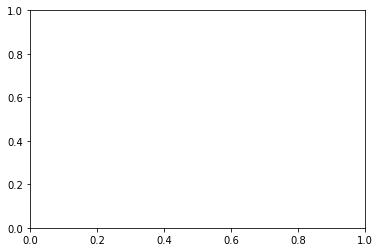

In [30]:
# import pickle
# from pathlib import Path
start_time = time.time()
problems = []
MMR_Experiment = Experiment(experiment_numbers=experiment_numbers["Children"], condition = conds_to_compare[events_to_tag[1]][1])
MMR_Experiment.setup_to_run()
for folder in base_contents_to_use:
    base = EXP_BASE+folder
    if os.path.isdir(base):
        tgt_dir = base +"\\" # +'\\Standardised\\'    
        print(tgt_dir)

        #clear_output()
        MMR_Experiment.all_stats_loop(tgt_dir, MMR_Experiment=None)

        # Also produce files post-standardisation
        tgt_dir = base +"\\" +'\\Standardised\\'    
        print(tgt_dir)        
        MMR_Experiment.all_stats_loop(tgt_dir, MMR_Experiment='NotNone')

    clear_output()
print("Problems with", problems)

In [31]:
# # idealized 2-D representations of sensor positions, and are primarily used for arranging individual sensor subplots in a topoplot, or for showing the approximate relative arrangement of sensors as seen from above.
# for key in ptcp.sensor_mapping_dct_simple.keys():
#     if ptcp.sensor_mapping_dct_simple[key] == 'MEG 041':
#         print(key)

In [32]:
# for folder in base_contents_to_use: #  + base_contents[13:14]:   # 10:11 is 0-300ms, 12:13 is 130-190ms
#     MMR_Experiment = None
#     gc.collect()
#     problem_folders = []
#     error_messages = []
#     folder_num = 1 # + start_
#     #for folder in base_contents[3:8]:
#     if not os.path.isfile(EXP_BASE+folder):
#     #for folder in base_contents[13:14] + base_contents[19:20]:   
#     #for folder in base_contents[11:12]:    

#         # Set up experiment
#         # Add participants
#         if MMR_Experiment==None:

#             tgt_dir = EXP_BASE+folder +"\\" # +'\\Standardised\\'
#             print("Target dir, ", tgt_dir, " folder #: ", folder_num)
#             os.chdir(tgt_dir)
#             file_names = glob.glob(f"{tgt_dir}*unstandardised.pickle")
#             #file_names = glob.glob(f"{tgt_dir}* standardised.pickle")
#             file_names = glob.glob(f"{tgt_dir}*.pickle")
#             if len(file_names) == 0:
#                 file_names = glob.glob(f"{tgt_dir}*Bins.pickle")

#             # Figure out which experiment it is for
#             with open(file_names[0], "rb") as f:
#                 ptcp = pickle.load(f)
#             condition_to_compare = ptcp.cond_B
#             events_to_tag = ptcp.events_to_tag  
#         #         print(condition_to_compare)
#         #         print(events_to_tag)
#         #         print(conds_to_compare[events_to_tag[1]][1])


#             MMR_Experiment = Experiment(experiment_numbers=experiment_numbers["Children"], condition = conds_to_compare[events_to_tag[1]][1])
#             MMR_Experiment.participants = []
#             gc.collect()        
#             for file in file_names:
#                 # with open(file, "rb") as f:
#                     #ptcp = pickle.load(f)

#                 include = False
#                 for child_string in child_participant_strings:
#                     if child_string in file:
#                         include = True
#                 for adult_string in adult_participant_strings:
#                     if adult_string in file:
#                         include = True            
#                 if include:
#                     wait_until_memory_free(required_memory = 3, max_wait_time_mins = 5) # This requires some memory (set conservatively here as I may run many threads, should only be 500MB)        
#                     MMR_Experiment.add_participants_from_disk([file])
#                     ptcp = MMR_Experiment.participants[-1]
#                     if ptcp.cond_A in ptcp.evoked_generic.keys() and ptcp.cond_B in ptcp.evoked_generic.keys():
#                         MMR_Experiment.condition_to_compare = ptcp.cond_B
#                         ptcp.epochs_ransac_autoreject.crop(tmin=EPOCH_START_ANALYSIS, tmax=EPOCH_END_ANALYSIS, include_tmax=True)
#                         ptcp.evoked_generic[ptcp.cond_A].crop(tmin=EPOCH_START_ANALYSIS, tmax=EPOCH_END_ANALYSIS, include_tmax=True)
#                         ptcp.evoked_generic[ptcp.cond_B].crop(tmin=EPOCH_START_ANALYSIS, tmax=EPOCH_END_ANALYSIS, include_tmax=True)
#                         ptcp.evoked_all.crop(tmin=EPOCH_START_ANALYSIS, tmax=EPOCH_END_ANALYSIS, include_tmax=True)
#                         del_attributes(ptcp, attrs_to_delete)
#                         MMR_Experiment.participants[-1] = copy.deepcopy(ptcp)                          
#                     else:
#                         print("@@@@@@@@@ WARNING : CONDITIONS ARE WRONG @@@@@@ ", folder, ptcp.p_id)
#                         del MMR_Experiment.participants[-1]
#             MMR_Experiment.removed = {}
#             MMR_Experiment.remove_bad_sound_delay()
#             #MMR_Experiment.remove_unwanted_data() 
            
            
#             # Needed for headshape loading
# #             age_num_groupings = int(100/20)
# #             MMR_Experiment.find_age_groupings(num_age_groupings=age_num_groupings)

            
            
#             MMR_Experiment.adjust_adult_head_info() 
            
            
#             MMR_Experiment.group_participants_on_age(num_per_group=None, absolute=True, system=None, age_cutoff=20)
#             MMR_Experiment.compare_group(condition='B')             

In [33]:
# MMR_Experiment.group_participants_on_age(num_per_group=None, absolute=True, system=None, age_cutoff=20)
# MMR_Experiment.compare_group(condition='B') 
# MMR_Experiment.compare_group(condition='A')
# MMR_Experiment.compare_group(condition=None) 

# timestring = str(int(MMR_Experiment.participants[0].epochs_ransac_autoreject.times[0]*1000+0.01))+ "-"+str(int(MMR_Experiment.participants[0].epochs_ransac_autoreject.times[-1]*1000+0.01))+"ms"
# MMR_Experiment.cond_A_evoked = []
# MMR_Experiment.cond_B_evoked = []
# r = 0
# for ptcp in MMR_Experiment.participants:
#     if r % 10 == 0:
#         print("Compare ERFs loop: participant #: ", r)
#     c_a = ptcp.evoked_generic[ptcp.cond_A]
#     c_b = ptcp.evoked_generic[ptcp.cond_B]
#     c_a_df = sum_df(c_a.to_data_frame())
#     c_b_df = sum_df(c_b.to_data_frame())
#     sum_a = c_a_df['sum'].values
#     sum_b = c_b_df['sum'].values
#     if sum([1 for x in sum_a if math.isnan(x)]) >0 or sum([1 for x in sum_b if math.isnan(x)]) >0:
#         print("@@@@@@@@@@@@@ WARN!! nans present for ", MMR_Experiment.p_id, ", not adding @@@@@@@@@@@@@@ ")
#     else:
#         MMR_Experiment.cond_A_evoked.append(c_a) 
#         MMR_Experiment.cond_B_evoked.append(c_b)
#     for var_to_delete in ['c_a','c_b']: #",'x','y']:
#         globals().pop(var_to_delete, None)
#     gc.collect()
#     r+=1
            

# MMR_Experiment.grand_average_cond_A = mne.grand_average(MMR_Experiment.cond_A_evoked)
# MMR_Experiment.grand_average_cond_B = mne.grand_average(MMR_Experiment.cond_B_evoked)
# MMR_Experiment.grand_average_cond_A_df = MMR_Experiment.grand_average_cond_A.to_data_frame()
# MMR_Experiment.grand_average_cond_B_df = MMR_Experiment.grand_average_cond_B.to_data_frame()
# MMR_Experiment.grand_average_cond_AB_diff = MMR_Experiment.grand_average_cond_B_df - MMR_Experiment.grand_average_cond_A_df
# MMR_Experiment.grand_average_cond_AB_diff['time'] = MMR_Experiment.grand_average_cond_A_df['time'].values

# MMR_Experiment.group_analysis(size_age_bucket_percent=20)

# times = MMR_Experiment.grand_average_cond_A_df['time'].values

In [35]:
len(MMR_Experiment.participants)

NameError: name 'MMR_Experiment' is not defined

In [ ]:
# error_messages

In [ ]:
print("Took", (time.time()-start_time)/60, " minutes ")

In [ ]:
# del MMR_Experiment
# gc.collect()